# Physics 494/594
## Linear Regression Excercise

In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s.set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Last Time

### [Notebook Link: 07_Linear_Regression_Solution.ipynb](./07_Linear_Regression_Solution.ipynb)

- Generalize the linear model from $1$ to $D$ dimensions
- Minimize the cost function to extract the optimal parameter set

## Today

- Find the maximal likelihood estimates for multivariate regression


<div class="span alert alert-success">
<h2>  Programming Exercise: Multivariate Regression </h2>

The linearized Navier-Stokes equations for the density of a continuous fluid as a function of pressure and temperature is given by:
    
\begin{equation}
\frac{\rho}{\rho_0} = \beta_T p - \alpha_P T 
\end{equation}

where $\rho_0$ is the density of the steady-state background flow, $\beta_T$ is the isothermal compressibility and $\alpha_P$ is the isobaric coefficient of thermal expansion. For the data in the file `../data/ns_equation_of_state.dat` find the maximum likelihood values of $\beta_T$ and $\alpha_P$.
    
    
<h3>Step 1:</h3>
    Inspect the data (via <code>!head</code>) and load from disk using <code>np.loadtxt</code>.
</div>

In [ ]:
file_name = # INSERT CODE HERE
ρ̄,p,T = np.loadtxt(file_name, unpack=True)

<div class="span alert alert-success">
    <h3> Step 2: </h3>
Plot the data;  you will need to use <code>np.reshape</code> in order to use <code>plt.pcolormesh</code>.  The matrix size should be $50\times50$
    </div>

In [ ]:
grid_size = # insert code here
T_2D = T.reshape(grid_size,grid_size)
p_2D = # insert code here 
ρ̄_2D = # insert code here

In [ ]:
plt.pcolormesh(T_2D,p_2D,ρ̄_2D, cmap='Spectral_r', rasterized=True)
plt.colorbar(label='Density Perturbation')
plt.ylabel('Pressure (atm)')
plt.xlabel('Temperature (K)');

<div class="span alert alert-success">
    <h3>Step 3: </h3>
Form the input and target arrays, making sure to add the extra dimension to incorporate a possible bias.
    <br /><br />
    
   **Note:** Here $T$ is the temperature (an input dimension) while our target is $\bar{\rho}$.
</div>

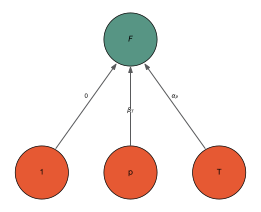

In [3]:
N = [2+1,1]
labels = [['1','p','T'],[r'$F$']]
ml4s.draw_network(N,node_labels=labels, weights=[['0',r'$\beta_T$',r'$\alpha_P$']], biases=[' '])

In [ ]:
X = # insert code here

In [ ]:
W_opt = # insert code here
C_opt = # insert code here

print(f'W_opt = {W_opt}')
print(f'C_opt = {C_opt}')

<div class="span alert alert-success">
    <h3>Step 4: </h3>
Compare the multi-variable regression result with the data.  You should start by computing the optimal value.
</div>

In [ ]:
ρ̄_opt = # insert code here

<div class="span alert alert-success">
You shouldn't have to touch any of the following code if you defined everything consistently.
</div>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')

points = ax.scatter(T_2D, p_2D, ρ̄_2D, marker='o', color='grey', s=3)

surf = ax.plot_surface(T_2D, p_2D, ρ̄_opt , rstride=1, cstride=1, cmap='Spectral_r', 
                       linewidth=0, antialiased=True, rasterized=True)

ax.set_xlabel('Temperature (K)',labelpad=8)
ax.set_ylabel('Pressure  (atm)',labelpad=8)
ax.set_zlabel(r'$\rho/\rho_0$',labelpad=15);